In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Mamiraua Dataset Plot

In [2]:
lag = 512 # [32, 64, 128, 256, 512

base = pd.read_pickle('../pkl_datasets/mamiraua_dataset_ACF_' + str(lag) + '.gzip')
cotas = pd.read_csv('./boundary_files/Cotas_HxC_bins_' + str(int(lag)) + '.csv')
noise = pd.read_csv('./coloredNoises/coloredNoises_' + str(int(lag)) + '.csv')
base.head()

,data,time,segment,ACF_512,H,JSD,C,n_components,date
0,NaN,193000,1481151932,"[1.0, 0.37452652281488064, -0.4572470836732914...",0.743314,0.460848,0.342555,318,20160902
1,NaN,193000,1481151940,"[1.0, 0.36301847821007244, -0.4661896159474963...",0.750170,0.454920,0.341267,320,20160902
2,NaN,193000,1481151945,"[1.0, 0.3193948317431444, -0.48139967542199696...",0.746164,0.453377,0.338294,318,20160902
3,NaN,193000,1481151923,"[1.0, 0.3343417243495787, -0.44062381002253476...",0.765414,0.439094,0.336088,315,20160902
4,NaN,193000,1481151928,"[1.0, 0.39136908696452055, -0.4659769219888371...",0.734133,0.468957,0.344277,320,20160902


## Data analysis by months

In [4]:
july = ['20160711', '20160712', '20160713', '20160714', '20160715']
september = ['20160901', '20160902', '20160903', '20160904', '20160905', '20160906', '20160907', '20160908']

df_july = base[base['date'].isin(july)]
df_september = base[base['date'].isin(september)]

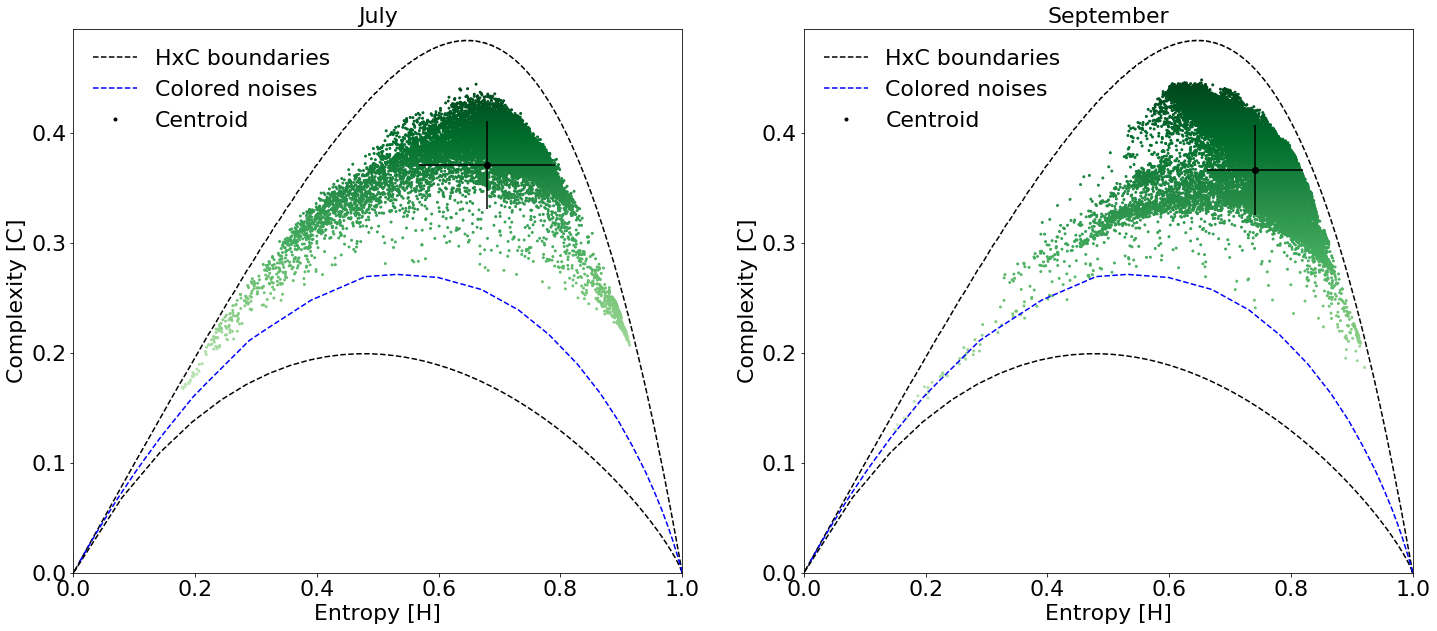

In [14]:
plt.figure(figsize=(24,10))
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)

plt.subplot(1,2,1)
plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')
plt.plot(np.mean(df_july['H']), np.mean(df_july['C']), '.k', label = 'Centroid')

plt.legend(loc = 'upper left', frameon=False)
plt.scatter(df_july['H'], df_july['C'], marker='.', s=15, c=df_july['C'], 
            norm=plt.Normalize(vmax=np.max(df_july['C']), vmin=np.min(df_july['C'])-0.1),
            cmap = 'Greens') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues

plt.errorbar(np.mean(df_july['H']), np.mean(df_july['C']), xerr=np.std(df_july['H']), yerr=np.std(df_july['C']), color = 'k',fmt='o')
plt.title('July')
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)

plt.subplot(1,2,2)
plt.plot(cotas['Entropy'],cotas['Complexity'], '--k', label = 'HxC boundaries')
plt.plot(noise['Entropy'],noise['Complexity'], '--b', label = 'Colored noises')
plt.xlim([0, 1])
plt.ylim([0, np.max(cotas['Complexity'])+0.01])
plt.ylabel('Complexity [C]')
plt.xlabel('Entropy [H]')
plt.plot(np.mean(df_september['H']), np.mean(df_september['C']), '.k', label = 'Centroid')
plt.legend(loc = 'upper left', frameon=False)

plt.scatter(df_september['H'], df_september['C'], marker='.', s=15, c=df_september['C'], 
            norm=plt.Normalize(vmax=np.max(df_september['C']), vmin=np.min(df_september['C'])-0.1),
            cmap = 'Greens') # seismic # viridis # plasma # jet # PuBu # YlOrRd # Blues



plt.errorbar(np.mean(df_september['H']), np.mean(df_september['C']), 
             xerr=np.std(df_september['H']), yerr=np.std(df_september['C']), 
             color = 'k',fmt='o', label = 'centroid')
plt.title('September')
plt.rc('font', size=22)
plt.rc('axes', titlesize=22)

plt.show()